In [1]:
import itertools
import json
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
from time import time

from strategies import strategies, compare, metrics
from trees import *

%load_ext autoreload
%autoreload 2

import warnings

In [30]:
a = np.array([[1,1,1], [2,2,2]])
b = np.array([[3,3,3], [4,4,4], [5,5,5]])
data = [a, b]
dim0 = len(data)
dim1 = len(max(data, key=len))
dim2 = len(data[0][0])

data_ = np.full((dim0,dim1,dim2,), 0)
for i, item in enumerate(data):
    data_[i,:len(item)] = item

names = [f'h_{cell}_{h_index}' for cell, h_index in itertools.product(range(dim1),range(dim2))]
data_ = pd.DataFrame(data_.reshape(dim0,dim1*dim2), columns=names)

In [52]:
data_.columns[['h_0' in c for c in data_.columns]]
data_.iloc[0].index.values

array(['h_0_0', 'h_0_1', 'h_0_2', 'h_1_0', 'h_1_1', 'h_1_2', 'h_2_0',
       'h_2_1', 'h_2_2'], dtype=object)

In [56]:
path = '/Users/Javiera/Desktop/Harvard/research/code/src/models/rf/results.pk'
import pickle

with open(path, 'rb') as f:
    results = pickle.load(f)
    
results['color_train'].split()

['precision',
 'recall',
 'f1-score',
 'support',
 'DSCT_SXPHE',
 '0.97',
 '0.94',
 '0.95',
 '157',
 'RRAB',
 '0.99',
 '0.99',
 '0.99',
 '993',
 'RRC',
 '0.97',
 '0.96',
 '0.97',
 '426',
 'accuracy',
 '0.98',
 '1576',
 'macro',
 'avg',
 '0.97',
 '0.97',
 '0.97',
 '1576',
 'weighted',
 'avg',
 '0.98',
 '0.98',
 '0.98',
 '1576']

In [2]:
ftrs_dir = '../../../../data/features'
features_path = f'{ftrs_dir}/gaia-sdss/features.csv'
features = pd.read_csv(features_path)

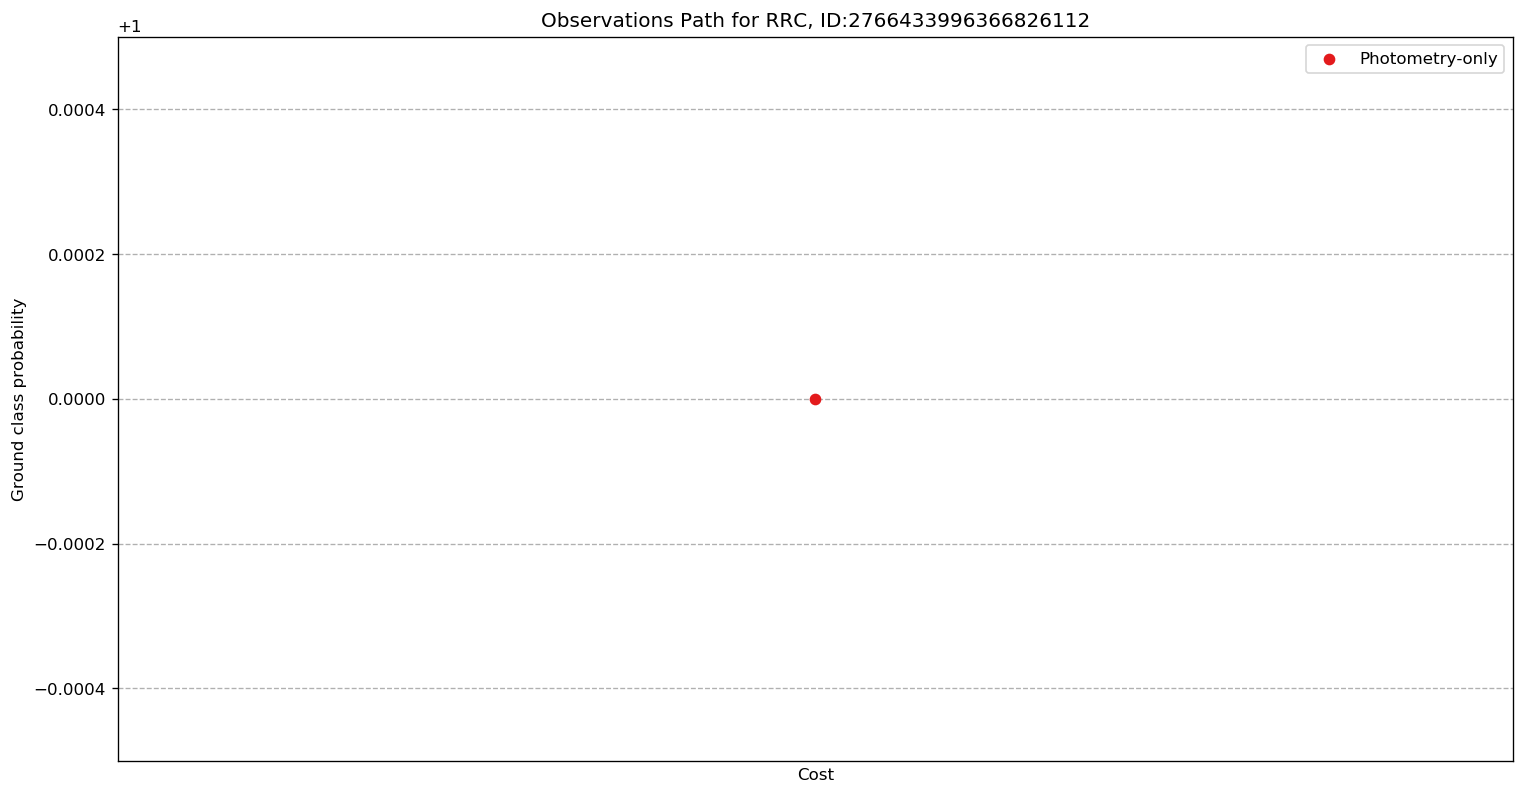

In [4]:
palette = sns.color_palette('Paired')
all_features = features.set_index('id_gaia').loc[[2766433996366826112]].reset_index().iloc[0]
all_clf = pickle.load(open('../../rf/classifiers.pkl', 'rb'))
p_thres = 0.9

tree_args = {'cost_obs': 1, 
             'cost_spec': 5, 
             'cost_col': 1, 
             'all_features': all_features, 
             'all_clf': all_clf,
             'p_thres':p_thres,
             'cost_coeff': 0.025
            }
root_args = {'n_obs': 5, 
             'n_spec': 0, 
             'n_color': 0
            }

fig, ax = plt.subplots(figsize=(15,8), dpi=120)

# greedy_prob = GreedyTree(greedy_on='probability', strategy_name='prob_greedy', **tree_args)
# greedy_prob.create_root(**root_args)
# greedy_prob.build_greedy()
# greedy_prob.plot_path(ax, 'Greedy on probability', palette[1])

# greedy_reward = GreedyTree(greedy_on='reward', strategy_name='reward_greedy', **tree_args)
# greedy_reward.create_root(**root_args)
# greedy_reward.build_greedy()
# greedy_reward.plot_path(ax, 'Greedy on reward', palette[3])

photo = PhotoTree(**tree_args, strategy_name='photometry_only')
photo.create_root(**root_args)
photo.build_tree()
photo.plot_path(ax, 'Photometry-only', palette[5])

# brute = BruteForceTree(**tree_args, strategy_name='brute_force')
# brute.create_root(**root_args)
# brute.build_tree()
# brute.plot_path(ax, 'Brute-force', palette[7])

# random = RandomTree(**tree_args, strategy_name='random')
# random.create_root(**root_args)
# random.build_tree()
# random.plot_path(ax, 'Random', palette[9])
# brute.plot_reward_contour(ax, reward=0.7, color='purple')

plt.title('Observations Path for '+all_features.label+ ', ID:'+str(all_features.id_gaia))
plt.show()

In [7]:
run = 10
save_dir = './strategies'
comparison_path = '{}/comparison{}.csv'.format(save_dir,run)
cost_path = '{}/cost{}.csv'.format(save_dir,run)
prob_path = '{}/prob{}.csv'.format(save_dir,run)
reward_path = '{}/reward{}.csv'.format(save_dir,run)
settings_path = '{}/settings{}.json'.format(save_dir,run)
summary_path = '{}/summary{}.csv'.format(save_dir,run)

strat_summ = pd.read_csv(summary_path)
strat_summ[(strat_summ.strategy=='unfeasible')].shape[0]

0

In [8]:
with open(settings_path) as f:
    d = json.load(f)
d

{'tree_args': {'cost_obs': 1,
  'cost_spec': 5,
  'cost_col': 1,
  'p_thres': 0.9,
  'cost_coeff': 0.025},
 'root_args': {'n_obs': 5, 'n_spec': 0, 'n_color': 0}}

In [9]:
strat_reward = pd.read_csv(reward_path)
strat_reward.head()

,strategy,=brute ocurrences,=brute rate,gt-brute ocurrences,gt-brute mean,gt-brute rate,lt-brute ocurrences,lt-brute mean,lt-brute rate
0,prob_greedy,504,0.527749,0,NaN,0.0,451,-0.136037,0.472251
1,reward_greedy,818,0.856545,0,NaN,0.0,137,-0.064759,0.143455
2,photometry_only,416,0.435602,0,NaN,0.0,539,-0.134493,0.564398


In [10]:
strat_cost = pd.read_csv(cost_path)
strat_cost.head()

,strategy,=brute ocurrences,=brute rate,gt-brute ocurrences,gt-brute mean,gt-brute rate,lt-brute ocurrences,lt-brute mean,lt-brute rate
0,prob_greedy,505,0.528796,447,6.494407,0.468063,3,-6.000000,0.003141
1,reward_greedy,822,0.860733,70,2.900000,0.073298,63,-4.285714,0.065969
2,photometry_only,472,0.494241,335,4.555224,0.350785,148,-1.750000,0.154974


In [11]:
strat_prob = pd.read_csv(prob_path)
strat_prob.head()

,strategy,=brute ocurrences,=brute rate,gt-brute ocurrences,gt-brute mean,gt-brute rate,lt-brute ocurrences,lt-brute mean,lt-brute rate
0,prob_greedy,612,0.640838,292,0.050937,0.305759,51,-0.080415,0.053403
1,reward_greedy,839,0.878534,27,0.027660,0.028272,89,-0.126897,0.093194
2,photometry_only,492,0.515183,144,0.047752,0.150785,319,-0.149509,0.334031


In [12]:
strat_comp = pd.read_csv(comparison_path)
strat_comp.head()

,gaia_id,prob_greedy_costdiff,prob_greedy_probdiff,prob_greedy_rewarddiff,reward_greedy_costdiff,reward_greedy_probdiff,reward_greedy_rewarddiff,photometry_only_costdiff,photometry_only_probdiff,photometry_only_rewarddiff
0,5361218697066624,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0.000000
1,36039689056047872,3,-0.025641,-0.100641,0,0.0,0.0,0,-0.028571,-0.028571
2,77097858419193216,0,0.000000,0.000000,0,0.0,0.0,-1,-0.088645,-0.063645
3,133572628208995712,0,0.000000,0.000000,0,0.0,0.0,-1,-0.297436,-0.272436
4,148369409017865984,3,0.051282,-0.023718,0,0.0,0.0,-2,-0.181685,-0.131685


In [13]:
strat_comp[strat_comp['reward_greedy_rewarddiff']<0]

,gaia_id,prob_greedy_costdiff,prob_greedy_probdiff,prob_greedy_rewarddiff,reward_greedy_costdiff,reward_greedy_probdiff,reward_greedy_rewarddiff,photometry_only_costdiff,photometry_only_probdiff,photometry_only_rewarddiff
5,153236088001040384,4,0.025641,-0.074359,-4,-0.102564,-0.002564,3,-0.154579,-0.229579
7,581576058353736832,13,0.102564,-0.222436,6,0.076923,-0.073077,8,0.102564,-0.097436
33,657965796923993216,5,0.025641,-0.099359,5,0.025641,-0.099359,-1,-0.031502,-0.006502
35,658457111118983040,1,0.000000,-0.025000,1,0.000000,-0.025000,0,0.000000,0.000000
39,673342849293548288,12,0.012698,-0.287302,-1,-0.038584,-0.013584,7,0.012698,-0.162302
44,682968523837145856,-3,-0.085714,-0.010714,-3,-0.085714,-0.010714,0,0.000000,0.000000
45,684161768831290240,1,-0.076923,-0.101923,-8,-0.230769,-0.030769,-5,-0.183150,-0.058150
46,684541272141576320,2,0.025641,-0.024359,2,0.025641,-0.024359,-1,-0.329570,-0.304570
63,696913316278537600,6,0.008791,-0.141209,1,-0.068132,-0.093132,0,0.000000,0.000000
64,697275850174605696,5,0.076923,-0.048077,5,0.076923,-0.048077,0,-0.026374,-0.026374


In [16]:
summary = pd.read_csv(summary_path)
summary = summary.drop('Unnamed: 0', axis=1)

In [33]:
summary[summary['gaia_id']==153236088001040384]

,gaia_id,strategy,probability,reward,cost,prediction,label
136,153236088001040384,prob_greedy,0.923077,0.548077,15,RRAB,RRAB
137,153236088001040384,reward_greedy,0.794872,0.619872,7,RRAB,RRAB
138,153236088001040384,photometry_only,0.742857,0.392857,14,RRAB,RRAB
139,153236088001040384,brute_force,0.897436,0.622436,11,RRAB,RRAB


In [28]:
import numpy as np

In [51]:
def make_settings():
    cost_spec = list(range(1,10))[::2]
    cost_coeff = np.linspace(1/40,1/10,4)

    run_path = '{}/runs.json'.format(save_dir)
    runs = {}
    for i, args in enumerate(itertools.product(cost_spec, cost_coeff)):
        runs[i] = {'cost_spec': args[0], 'cost_coeff': args[1]}

    with open(run_path, 'w') as f:
        json.dump(runs, f)

    return runs

In [52]:
make_settings()

{0: {'cost_spec': 1, 'cost_coeff': 0.025},
 1: {'cost_spec': 1, 'cost_coeff': 0.05},
 2: {'cost_spec': 1, 'cost_coeff': 0.07500000000000001},
 3: {'cost_spec': 1, 'cost_coeff': 0.1},
 4: {'cost_spec': 3, 'cost_coeff': 0.025},
 5: {'cost_spec': 3, 'cost_coeff': 0.05},
 6: {'cost_spec': 3, 'cost_coeff': 0.07500000000000001},
 7: {'cost_spec': 3, 'cost_coeff': 0.1},
 8: {'cost_spec': 5, 'cost_coeff': 0.025},
 9: {'cost_spec': 5, 'cost_coeff': 0.05},
 10: {'cost_spec': 5, 'cost_coeff': 0.07500000000000001},
 11: {'cost_spec': 5, 'cost_coeff': 0.1},
 12: {'cost_spec': 7, 'cost_coeff': 0.025},
 13: {'cost_spec': 7, 'cost_coeff': 0.05},
 14: {'cost_spec': 7, 'cost_coeff': 0.07500000000000001},
 15: {'cost_spec': 7, 'cost_coeff': 0.1},
 16: {'cost_spec': 9, 'cost_coeff': 0.025},
 17: {'cost_spec': 9, 'cost_coeff': 0.05},
 18: {'cost_spec': 9, 'cost_coeff': 0.07500000000000001},
 19: {'cost_spec': 9, 'cost_coeff': 0.1}}